In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Street Light Data Source from 2014-2018
street_light_reports = "ServiceRequests_2014_2018.csv" 

# Read Street Light Data and store into Pandas data frame, add ability to read special chrarters
street_light_reports_pd = pd.read_csv(street_light_reports,encoding= "ISO-8859-1")
street_light_reports_pd.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,01/01/2014,Completed,01/06/2014,14-00002286,Street Lights - All/Out,1800 S ST LOUIS AVE,60623.0,1.153317e+06,1.891155e+06,24.0,10.0,29.0,41.857173,-87.712721,"(41.857172873929, -87.712720931217)"
1,01/01/2014,Completed,01/03/2014,14-00001931,Street Lights - All/Out,2800 W 25TH ST,60623.0,1.158100e+06,1.887282e+06,12.0,10.0,30.0,41.846450,-87.695272,"(41.846449889163, -87.695272394356)"
2,01/01/2014,Completed,01/03/2014,14-00001932,Street Lights - All/Out,2400 S FRANCISCO AVE,60623.0,1.157415e+06,1.887664e+06,12.0,10.0,30.0,41.847512,-87.697777,"(41.847512397968, -87.697776971725)"
3,01/01/2014,Completed,01/07/2014,14-00002375,Street Lights - All/Out,2555 W CARMEN AVE,60625.0,1.158098e+06,1.933770e+06,40.0,20.0,4.0,41.974016,-87.694009,"(41.974015869703, -87.694008589773)"
4,01/01/2014,Completed,01/03/2014,14-00002025,Street Lights - All/Out,8400 S SOUTH CHICAGO AVE,60617.0,1.191718e+06,1.849687e+06,8.0,4.0,45.0,41.742535,-87.573117,"(41.742534902585, -87.57311733998)"


In [2]:
#Create Community Area Count Variable
community_area_counts = street_light_reports_pd.groupby(["Community Area"])["Creation Date"].nunique()
community_area_counts

#Display Summary of Community Area Counts in Data Frame
community_area_summary_table = pd.DataFrame({"Total Street Light Outage Reportings": community_area_counts})
community_area_summary_table

,Total Street Light Outage Reportings
Community Area,
0.0,192
1.0,323
2.0,637
3.0,363
4.0,476
...,...
73.0,937
74.0,520
75.0,817


In [3]:
# Street Light Data Source from 2014-2018
community_area_names = "CommAreas_20200108.csv" 

# Read Street Light Data and store into Pandas data frame, add ability to read special characters
community_area_names_pd = pd.read_csv(community_area_names,encoding= "ISO-8859-1")
community_area_names_pd.head()

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906


In [4]:
#Display Summary of Community Area Names and Corresposonding Number in Data Frame
community_area_names=community_area_names_pd[['COMMUNITY','AREA_NUMBE']]
community_area_names

,COMMUNITY,AREA_NUMBE
0,DOUGLAS,35
1,OAKLAND,36
2,FULLER PARK,37
3,GRAND BOULEVARD,38
4,KENWOOD,39
...,...,...
72,MOUNT GREENWOOD,74
73,MORGAN PARK,75
74,OHARE,76
75,EDGEWATER,77


In [5]:
# Merge Dataframes to get Street Light Outage Reports and Community Names in One Dataframe
community_data_merge = pd.merge(community_area_summary_table,community_area_names,left_on='Community Area', right_on='AREA_NUMBE', how="right")

#Sort Merged Dataframe by Highest Street Light Outages to Find Community With Highest Street Outages
community_sort = community_data_merge.sort_values(by='Total Street Light Outage Reportings', ascending=False)

# Display the Top 10 Neighborhoods With Most Street Light Outages
community_sort.head(10)

,Total Street Light Outage Reportings,COMMUNITY,AREA_NUMBE
24,1207,AUSTIN,25
48,1092,ROSELAND,49
23,1092,WEST TOWN,24
69,1085,ASHBURN,70
70,1071,AUBURN GRESHAM,71
27,977,NEAR WEST SIDE,28
65,957,CHICAGO LAWN,66
22,951,HUMBOLDT PARK,23
72,937,WASHINGTON HEIGHTS,73
42,924,SOUTH SHORE,43


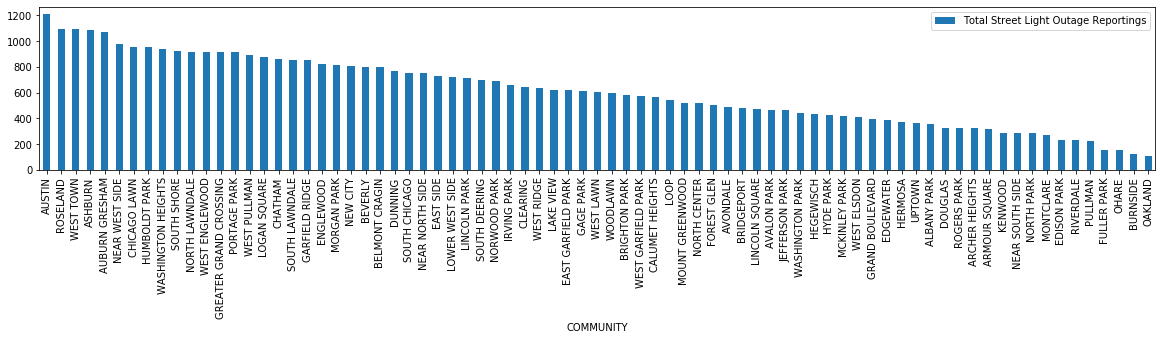

In [6]:
#Display Bar Chart to compare community area street light outages
community_chart = community_sort.plot.bar(y='Total Street Light Outage Reportings', x='COMMUNITY', rot=90, figsize=(20,3))